# EDA - Exploratory Data Analysis Using Python
### Notes by Naresh Padiyar
### A picture is equivalent to a thousand words. 
### Data --> Business Problem --> Data Viz (Plotting the Graph) --> EDA (Making Insights/Trends/Patterns/Observations out of the graph) --> Business Decisions
### Pre-requisite: Basic Python + Pandas + Numpy  + Matplotlib + Seaborn

## Steps for EDA
- Importing necessary libraries
- Data Loading
- Data Understanding
- Missing Value Check
- Missing Value Imputation
- Univariate Analysis (One variable at a time - Check the distribution of the column)
- Bivariate Analysis (Two variable at a time - Relationship between the two columns)
- Multivariate Analysis (More than two variables at a time - Relationship between more than two columns)

## Importing Necessary Library

In [1]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visuization
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [5]:
df = pd.read_csv("/Users/nareshpadiyar/Downloads/titanic_dataset.csv")
#https://drive.google.com/file/d/1plN-KWVopblsqOdgTYPn-O-zG5cWrkf7/view?usp=drive_link

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explaination of column names
#### PassengerId: Unique id for every passenger like a primary key 
#### Survived: Whether a passenger survived or not 
#### Pclass: Passenger Class basically class of travel 
#### Name: Name of the passenger 
#### Sex: Gender of the passenger 
#### Age: Age of the passenger 
#### SibSp: (Siblings + Spouse) Count of Siblings and Spouse along with passenger is travelling 
#### Parch: (Parent + Children) Count of Parent and Children along with passenger is travelling 
#### Ticket: Ticket id 
#### Fare: Fare paid by passenger for travel (in $s) 
#### Cabin: Cabin no. or room no. allocated 
#### Embarked: Boarding Station

In [13]:
df.shape
# Check the shape (Rows and Column) in the excel.
# 3 functions of pandas to be used without () brackets is shape,size and columns

(891, 12)

In [14]:
df.info()
#Check the column/feature/attribute name and its datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Value Check

In [17]:
## Missing value check
## Display percentage of missing value in each column
100*df.isnull().sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### Missing Values Column --> Age(~20%), Cabin(~77%), Embarked(~0.22%)
#### Strategy: 
#### (a) Columns having high percentage of missing values (>40% or 50%), directly discard that column from the analysis.
#### (b) Columns having missing values under acceptable range we prefer to impute them (Replace with some values)
#### (c) For numerical columns we prefer to use mean or median. (Median is preferred)
#### (d) Median is not affected with the outliers. (Extreme Values)
#### (e) For categorical columns we prefer to use mode.

In [18]:
# Cabin column has more thabn 40% of missing values so straight away dropping it.
df1 = df.drop("Cabin", axis=1)
# axis=1 as we are dropping the column (axis=0 if you want to drop row)

In [19]:
100*df1.isnull().sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

In [24]:
med=df1["Age"].median()
df1["Age"]=df1["Age"].fillna(med)
# Fillna function will replace/impute all missing values of age column with median value i.e. 28

In [26]:
100*df1.isnull().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Embarked       0.224467
dtype: float64

In [27]:
df1["Embarked"].value_counts()
# "S" is the most frequent value in Embarked column

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [28]:
df1["Embarked"]=df1["Embarked"].fillna("S")

In [29]:
100*df1.isnull().sum()/len(df)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

# Univariate Analysis

## Numerical

In [39]:
df1["Age"].describe() 
# From the output, make a judgement of the range of bins to be used fo plotting a graph.

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

# Histogram

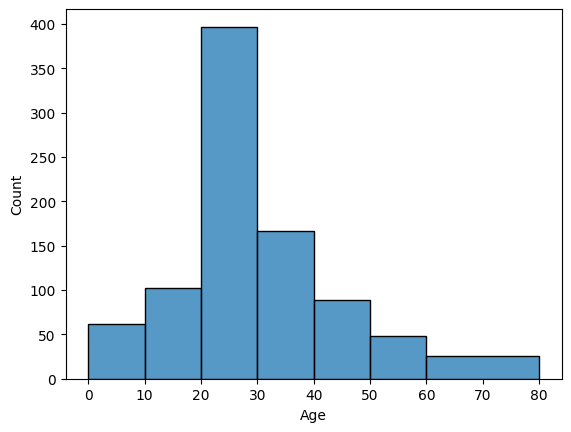

In [43]:
# Plotting a Histogram, Frequency Distribution in Age Bucket
sns.histplot(x=df1["Age"],bins=[0,10,20,30,40,50,60,80])  #range (0,90,10) #bins=5
plt.show()

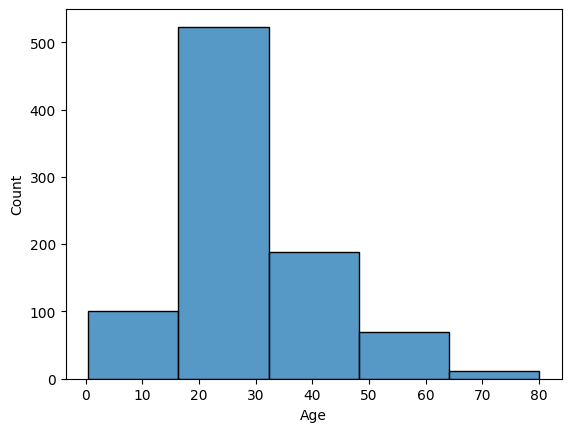

In [44]:
sns.histplot(x=df1["Age"],bins=5)  #same as previous, instead of giving a range of bins, we only gave the number of bins.
plt.show()

# Boxplot

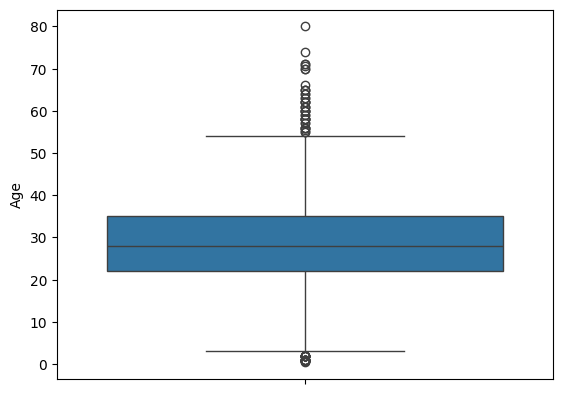

In [52]:
# Boxplot, Purpose of boxplot is to display a Quartile (Quarter + Percentile)
# Boxplot is only for numerical data
sns.boxplot(y=df1["Age"])
plt.show()

# Quarter = Quarter + Percentile
# Q1 = First Quartile (25th Percentile) --> (Left/Bottom side of the box)
# Q2 = Second Quartile (50th Percentile) --> (Middle line of the box) (Median)
# Q3 = Third Quartile (75th Percentile) --> (Right/top side of the box)

# Blackdots: Outliers (Extreme Values)
# Two Whiskers: (Emperical Relationships)
# Lower Whisker: Q1-1.5*(Q3-Q1)
# Upper Whisket: Q3+1.5*(Q3-Q1)
# IQR : Inter Quartile Range (Q3-Q1)

# Countplot (Categorical)

#### Histogram and Countplot are types of Barplot

In [53]:
df1["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

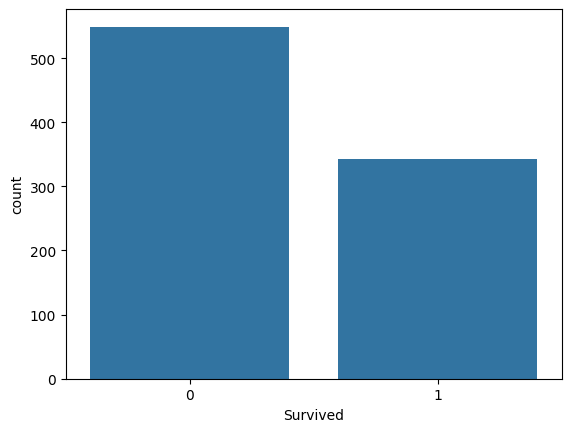

In [54]:
sns.countplot(x=df1["Survived"])
plt.show()

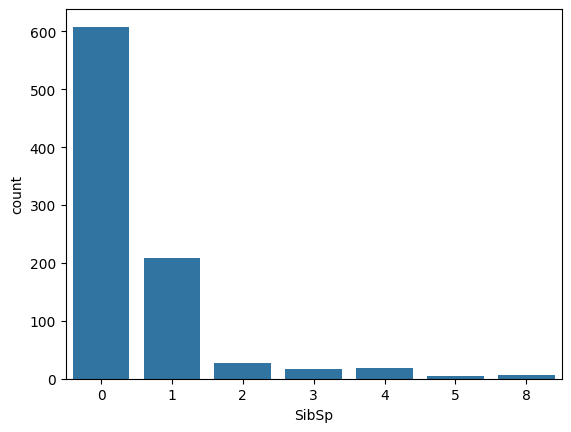

In [55]:
sns.countplot(x=df1["SibSp"])
plt.show()

# Bivariate Analysis

#### Analyze 2 variables at a time (Categorical Vs Numerical)
#### Also known as segmented analysis

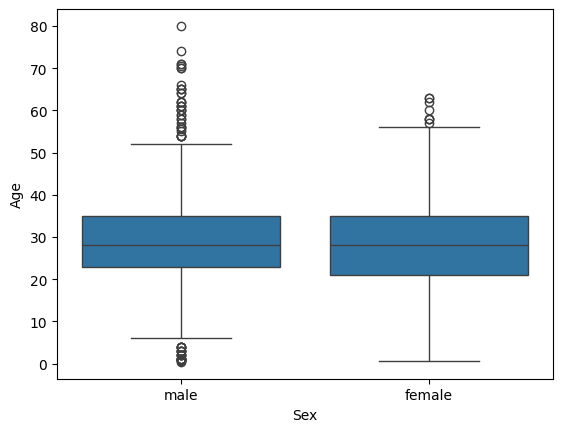

In [56]:
sns.boxplot(x=df1["Sex"],y=df1["Age"])
plt.show()

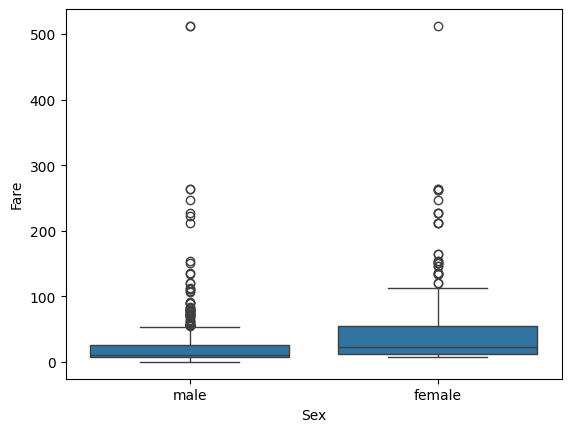

In [58]:
sns.boxplot(x=df1["Sex"],y=df1["Fare"])
plt.show()

# Numerical Vs Numerical

# Scatterplot
#### Relationship between 2 numerical variables

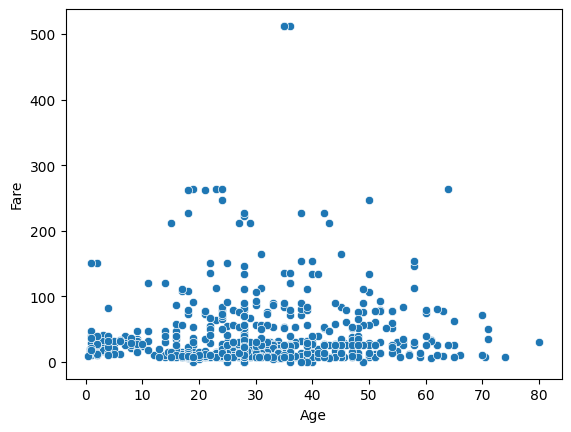

In [59]:
sns.scatterplot(x=df1["Age"],y=df1["Fare"])
plt.show()

#### Positive Relationship: One variable increase leads to increase in another variable (Positive Corr)
#### Negative Relationship: One varaible increase leads to decrease in another variable (Negative Corr)
#### No Relationship: One variable seems unaffected from another variable (No Corr)

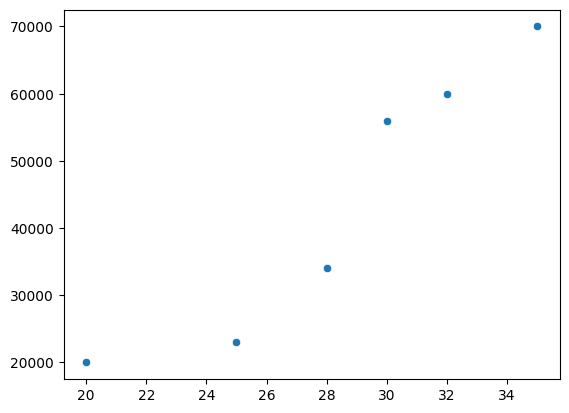

In [63]:
# Positive Relationship
sns.scatterplot(x=[20,25,28,30,32,35],y=[20000,23000,34000,56000,60000,70000])
plt.show()

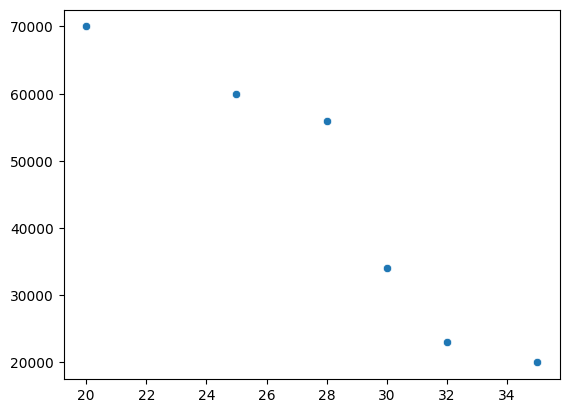

In [64]:
# Negative Relationship
sns.scatterplot(x=[20,25,28,30,32,35],y=[70000,60000,56000,34000,23000,20000])
plt.show()

# Multivariate Analysis

#### Multivariate analysis is used when you compare more than 2 variables or columns

# Heatmap

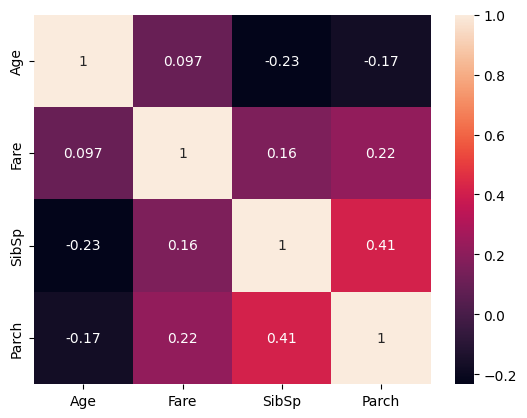

In [66]:
sns.heatmap(df1[["Age","Fare","SibSp","Parch"]].corr(),annot=True)
plt.show()

#### Correlation represents strength of relationship between variables
#### Correlation lies in the range of -1 to 1
#### ----> Theoritcal Interpretation
#### Negative correlation (0 to -1) shows inverse relationship
#### Positive correlation (0 to 1) shows direct relationship
#### 0 or near by correlation represents no relationship
#### ----> Industrial Interpretation
#### Correlation value > 0.7 ---> High Positive Correlation
#### 0.3 < Correlation value  < 0.7 ---> Weak Positive Correlation
#### Correlation value < -0.7 ---> High Negative Correlation
#### -0.7 < Correlation value  < -0.3 ---> Weak Negative Correlation
#### -0.3 < Correlation value  < 0.3 ---> No or almost no Correlation

### Corr(x,y)=Corr(y,x) (Lower Triangle and Upper Triangle)
### Corr(x,y)=1 (Diagonal)